In [25]:
#Importando as bibliotecas

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
from sklearn.model_selection import train_test_split

In [2]:
#Importando os dados e salvando e um dataframe

df = pd.read_csv("comp_bikes_mod.csv")

In [3]:
#Exibindo o dataframe

df

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1.0,NaN,1.0,0.0,1.0,0.0,0.0,6.0,0.0,1.0,NaN,0.2879,0.81,0.0000,3.0,13.0,16.0
1,2.0,2011-01-01,1.0,0.0,1.0,1.0,0.0,6.0,0.0,NaN,0.22,0.2727,0.80,0.0000,8.0,32.0,40.0
2,3.0,2011-01-01,1.0,0.0,1.0,2.0,0.0,6.0,0.0,1.0,0.22,0.2727,0.80,0.0000,5.0,27.0,32.0
3,4.0,2011-01-01,1.0,0.0,1.0,3.0,0.0,6.0,0.0,1.0,0.24,0.2879,0.75,0.0000,3.0,10.0,13.0
4,5.0,2011-01-01,1.0,0.0,1.0,4.0,0.0,6.0,NaN,1.0,0.24,0.2879,0.75,0.0000,0.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,17375.0,2012-12-31,NaN,1.0,12.0,19.0,0.0,1.0,1.0,2.0,0.26,0.2576,0.60,0.1642,11.0,108.0,119.0
17375,17376.0,2012-12-31,1.0,1.0,12.0,20.0,0.0,1.0,1.0,2.0,0.26,0.2576,0.60,0.1642,NaN,NaN,89.0
17376,17377.0,NaN,1.0,1.0,12.0,21.0,0.0,1.0,1.0,1.0,0.26,0.2576,0.60,0.1642,7.0,83.0,90.0
17377,NaN,2012-12-31,1.0,1.0,NaN,NaN,0.0,1.0,1.0,1.0,0.26,0.2727,0.56,0.1343,13.0,48.0,61.0


In [4]:
#Descrição do dataframe

df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,15641.000000,15641.000000,15641.000000,15641.000000,15641.000000,15641.000000,15641.000000,15641.000000,15641.000000,15641.000000,15641.000000,15641.000000,15641.000000,15641.000000,15641.000000,15641.000000
mean,8676.513842,2.503420,0.501758,6.536091,11.521258,0.028131,2.999233,0.682118,1.423950,0.497062,0.476281,0.627579,0.189247,35.583147,153.644972,189.919826
std,5010.773755,1.107636,0.500013,3.441490,6.917606,0.165353,2.005300,0.465668,0.638982,0.192451,0.172520,0.192893,0.122188,49.226455,151.750573,181.972508
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4335.000000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8678.000000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.164200,17.000000,115.000000,142.000000
75%,13005.000000,3.000000,1.000000,10.000000,17.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17377.000000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


In [5]:
#Informações do dataframe

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     15641 non-null  float64
 1   dteday      15641 non-null  object 
 2   season      15641 non-null  float64
 3   yr          15641 non-null  float64
 4   mnth        15641 non-null  float64
 5   hr          15641 non-null  float64
 6   holiday     15641 non-null  float64
 7   weekday     15641 non-null  float64
 8   workingday  15641 non-null  float64
 9   weathersit  15641 non-null  float64
 10  temp        15641 non-null  float64
 11  atemp       15641 non-null  float64
 12  hum         15641 non-null  float64
 13  windspeed   15641 non-null  float64
 14  casual      15641 non-null  float64
 15  registered  15641 non-null  float64
 16  cnt         15641 non-null  float64
dtypes: float64(16), object(1)
memory usage: 2.3+ MB


In [6]:
#Tipos de dados contidos no dataframe

df.dtypes

instant       float64
dteday         object
season        float64
yr            float64
mnth          float64
hr            float64
holiday       float64
weekday       float64
workingday    float64
weathersit    float64
temp          float64
atemp         float64
hum           float64
windspeed     float64
casual        float64
registered    float64
cnt           float64
dtype: object

In [8]:
#Gerando um novo dataframe sem as linhas nulas da coluna dteday

df_dteday = df.dropna(subset=['dteday'])

In [9]:
#Descrição do novo dataframe gerado (feature temp)

df_dteday['temp'].describe()

count    14066.000000
mean         0.496926
std          0.192971
min          0.020000
25%          0.340000
50%          0.500000
75%          0.660000
max          1.000000
Name: temp, dtype: float64

In [10]:
#Descrição do novo dataframe gerado (feature windspeed)

df_dteday['windspeed'].describe()

count    14082.000000
mean         0.189552
std          0.122309
min          0.000000
25%          0.104500
50%          0.164200
75%          0.253700
max          0.850700
Name: windspeed, dtype: float64

In [24]:
#Treinando os dados

X_train, X_test, y_train, y_test = train_test_split(df_dteday, df_dteday.season, test_size = 0.2, random_state = 0)

X_train.shape, X_test.shape

((12512, 17), (3129, 17))

In [14]:
#Dataframe sem as linhas nulas da coluna dteday

df_dteday

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
1,2.0,2011-01-01,1.0,0.0,1.0,1.0,0.0,6.0,0.0,NaN,0.22,0.2727,0.80,0.0000,8.0,32.0,40.0
2,3.0,2011-01-01,1.0,0.0,1.0,2.0,0.0,6.0,0.0,1.0,0.22,0.2727,0.80,0.0000,5.0,27.0,32.0
3,4.0,2011-01-01,1.0,0.0,1.0,3.0,0.0,6.0,0.0,1.0,0.24,0.2879,0.75,0.0000,3.0,10.0,13.0
4,5.0,2011-01-01,1.0,0.0,1.0,4.0,0.0,6.0,NaN,1.0,0.24,0.2879,0.75,0.0000,0.0,1.0,1.0
5,6.0,2011-01-01,1.0,0.0,1.0,5.0,0.0,6.0,0.0,2.0,0.24,0.2576,0.75,0.0896,0.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17373,17374.0,2012-12-31,1.0,1.0,12.0,18.0,0.0,1.0,1.0,2.0,0.26,NaN,0.48,0.1343,10.0,112.0,122.0
17374,17375.0,2012-12-31,NaN,1.0,12.0,19.0,0.0,1.0,1.0,2.0,0.26,0.2576,0.60,0.1642,11.0,108.0,119.0
17375,17376.0,2012-12-31,1.0,1.0,12.0,20.0,0.0,1.0,1.0,2.0,0.26,0.2576,0.60,0.1642,NaN,NaN,89.0
17377,NaN,2012-12-31,1.0,1.0,NaN,NaN,0.0,1.0,1.0,1.0,0.26,0.2727,0.56,0.1343,13.0,48.0,61.0


In [21]:
#Convertendo o tipo da feature dteday, de string para datetime

df_dteday['dteday'] = pd.to_datetime(df_dteday['dteday'])

/home/marco/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [22]:
#Exibindo os tipos das features do dataframe df_dteday

df_dteday.dtypes

instant              float64
dteday        datetime64[ns]
season               float64
yr                   float64
mnth                 float64
hr                   float64
holiday              float64
weekday              float64
workingday           float64
weathersit           float64
temp                 float64
atemp                float64
hum                  float64
windspeed            float64
casual               float64
registered           float64
cnt                  float64
dtype: object

In [23]:
#Descrevendo a feature dteday (verificando as datas mínima e máxima)

df_dteday['dteday'].describe()

count                   15641
unique                    731
top       2011-06-04 00:00:00
freq                       24
first     2011-01-01 00:00:00
last      2012-12-31 00:00:00
Name: dteday, dtype: object

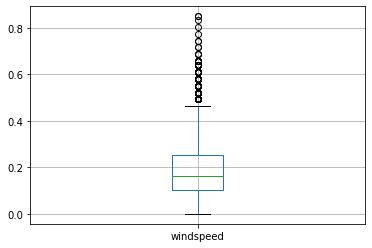

In [26]:
#Criando um gráfico (boxplot) da feature windspeed

df_dteday.boxplot(column = ['windspeed'])

In [29]:
plt.matshow(df_dteday['season'], df_dteday['temp'], df_dteday['atemp'], df_dteday['hum'], df_dteday['windspeed'])

TypeError: matshow() takes from 1 to 2 positional arguments but 5 were given

In [31]:
corr = df_dteday.corr()
corr.style.background_gradient(cmap='coolwarm')

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
instant,1.000000,0.407970,0.866207,0.488959,-0.008643,0.014597,-0.001126,-0.010626,-0.020270,0.141681,0.141808,0.007919,-0.072738,0.167456,0.288272,0.282132
season,0.407970,1.000000,-0.005610,0.830177,-0.004903,-0.006846,0.005788,0.011555,-0.013153,0.311273,0.319559,0.146984,-0.149802,0.123779,0.173305,0.179190
yr,0.866207,-0.005610,1.000000,-0.010337,-0.006261,0.007763,-0.008526,-0.000958,-0.026142,0.040857,0.037290,-0.082335,-0.010422,0.141733,0.258888,0.252729
mnth,0.488959,0.830177,-0.010337,1.000000,-0.005681,0.021196,0.018991,-0.004235,0.002774,0.202203,0.210337,0.158109,-0.126643,0.074406,0.127226,0.129162
hr,-0.008643,-0.004903,-0.006261,-0.005681,1.000000,0.009332,-0.010738,-0.003002,-0.023388,0.142102,0.136946,-0.277403,0.140474,0.303261,0.371388,0.391391
holiday,0.014597,-0.006846,0.007763,0.021196,0.009332,1.000000,-0.099102,-0.250450,-0.018945,-0.031273,-0.037606,-0.008809,0.008267,0.014519,-0.050193,-0.036150
weekday,-0.001126,0.005788,-0.008526,0.018991,-0.010738,-0.099102,1.000000,0.038821,0.004393,-0.004478,-0.011512,-0.035510,0.011014,0.025301,0.020142,0.021396
workingday,-0.010626,0.011555,-0.000958,-0.004235,-0.003002,-0.250450,0.038821,1.000000,0.050468,0.053113,0.055287,0.017469,-0.010926,-0.300811,0.130360,0.028170
weathersit,-0.020270,-0.013153,-0.026142,0.002774,-0.023388,-0.018945,0.004393,0.050468,1.000000,-0.101245,-0.105254,0.418574,0.025729,-0.152335,-0.118396,-0.141622
temp,0.141681,0.311273,0.040857,0.202203,0.142102,-0.031273,-0.004478,0.053113,-0.101245,1.000000,0.988102,-0.069887,-0.016022,0.458735,0.329653,0.405867
